In [8]:
**Name:**  
**StudentID:**   

SyntaxError: invalid syntax (2927809378.py, line 1)

Train MSE (Heights-Weights): 0.5197


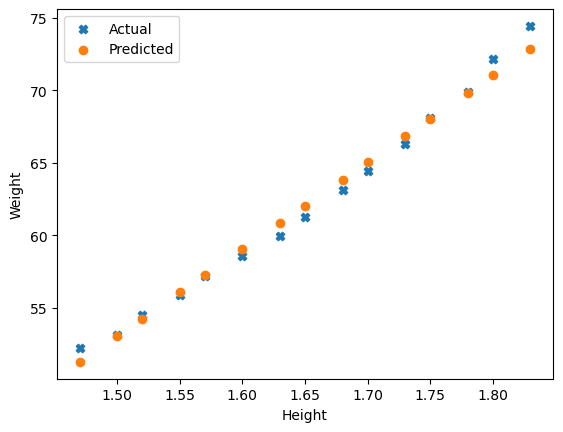

Training MSE (Advertising): 2.6761
Test MSE (Advertising): 2.9078


In [11]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ----------------------------------------------------------
# LINEAR REGRESSION CLASS (Gradient Descent)
# ----------------------------------------------------------

class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def train(self, X, y):
        # Add bias column
        X = np.insert(X, 0, 1, axis=1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        n = X.shape[0]
        y_pred = X.dot(self.weights)
        grad = (1 / n) * X.T.dot(y_pred - y)
        self.weights -= self.lr * grad

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X.dot(self.weights)

# ----------------------------------------------------------
# METRIC: MEAN SQUARED ERROR
# ----------------------------------------------------------

def mean_squared_error(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

# ----------------------------------------------------------
# NORMALIZATION HELPERS
# ----------------------------------------------------------

def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

# ----------------------------------------------------------
# TRAIN/TEST SPLIT HELPER
# ----------------------------------------------------------

def split_indices(n, test_frac, seed):
    n_test = int(test_frac * n)
    np.random.seed(seed)
    idxs = np.random.permutation(n)
    return idxs[n_test:], idxs[:n_test]

# ==========================================================
# QUESTION 1: LINEAR REGRESSION
# ==========================================================

# ------------- HEIGHT WEIGHT DATASET ----------------------

df = pd.read_csv('./heights.csv')
X_train = np.array(df['Height']).reshape(-1, 1)
y_train = np.array(df['Weight'])

model = LinearRegression(lr=0.01, epochs=100000)
model.train(X_train, y_train)

y_pred = model.predict(X_train)
print("Train MSE (Heights-Weights): {:.4f}".format(mean_squared_error(y_pred, y_train)))

plt.scatter(X_train, y_train, marker='X', label='Actual')
plt.scatter(X_train, y_pred, marker='o', label='Predicted')
plt.legend()
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

# ------------- MULTIPLE LINEAR REGRESSION -----------------

df = pd.read_csv('./advertising.csv')  
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

# Normalize features
minmax = dataset_minmax(X.tolist())
X = np.array(normalize_dataset(X.tolist(), minmax))

# Split train/test
train_indices, test_indices = split_indices(df.shape[0], test_frac=0.2, seed=42)
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Train model
model = LinearRegression(lr=0.01, epochs=100000)
model.train(X_train, y_train)

# Evaluate
train_mse = mean_squared_error(model.predict(X_train), y_train)
test_mse = mean_squared_error(model.predict(X_test), y_test)
print("Training MSE (Advertising): {:.4f}".format(train_mse))
print("Test MSE (Advertising): {:.4f}".format(test_mse))


Train Accuracy (Height-Weight Binary): 1.0000


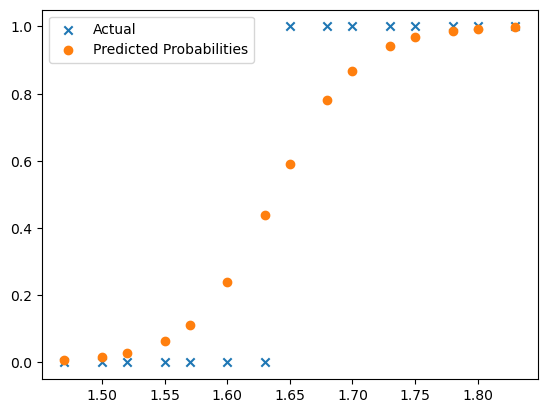

Train Accuracy (Banknote): 0.9545
Test Accuracy (Banknote): 0.9270


In [14]:

# ==========================================================
# QUESTION 2: LOGISTIC REGRESSION
# ==========================================================

class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        n = X.shape[0]
        y_pred = self.sigmoid(X.dot(self.weights))
        grad = (1 / n) * X.T.dot(y_pred - y)
        self.weights -= self.lr * grad

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return self.sigmoid(X.dot(self.weights))


# ----------------------------------------------------------
# METRIC: ACCURACY
# ----------------------------------------------------------

def accuracy(y_pred, y_actual):
    return np.mean(y_pred == y_actual)


# ------------- HEIGHT WEIGHT (BINARY) ----------------------

df = pd.read_csv('./heights.csv')
X_train = np.array(df['Height']).reshape(-1, 1)
y_train = np.array((df['Weight'] >= 60).astype('float'))

model = LogisticRegression(lr=0.1, epochs=100000)
model.train(X_train, y_train)

y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')

print("Train Accuracy (Height-Weight Binary): {:.4f}".format(accuracy(y_pred, y_train)))

plt.scatter(X_train, y_train, marker='x', label='Actual')
plt.scatter(X_train, y_pred_probs, marker='o', label='Predicted Probabilities')
plt.legend()
plt.show()


# ------------- BANKNOTE AUTHENTICATION ---------------------

df = pd.read_csv('./banknote.csv')
X = np.array(df[['variance', 'skewness', 'curtosis', 'entropy']])
y = np.array(df['class'])

# Normalize features
minmax = dataset_minmax(X.tolist())
X = np.array(normalize_dataset(X.tolist(), minmax))

# Split train/test
train_indices, test_indices = split_indices(df.shape[0], test_frac=0.2, seed=42)
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Train logistic model
model = LogisticRegression(lr=0.1, epochs=10000)
model.train(X_train, y_train)

# Evaluate
train_acc = accuracy((model.predict(X_train) >= 0.5).astype('float'), y_train)
test_acc = accuracy((model.predict(X_test) >= 0.5).astype('float'), y_test)

print("Train Accuracy (Banknote): {:.4f}".format(train_acc))
print("Test Accuracy (Banknote): {:.4f}".format(test_acc))
